# Bad Model, Logistic Regression to predict what will be ordered at a certain DOW and time of day

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [7]:
train_data = pd.read_csv('C:/Users/adnan/Downloads/priorordersmerged2.csv')
train_data = train_data.dropna()# Replace with the path to your training table
test_data = pd.read_csv('C:/Users/adnan/Downloads/trainorder.csv')    
test_data = test_data.dropna()

In [8]:

X_train = train_data[['order_dow', 'order_hour_of_day', 'days_since_prior_order']]
y_train = train_data['department_id']

In [9]:

X_test = test_data[['order_dow', 'order_hour_of_day', 'days_since_prior_order']]
y_test = test_data['department_id']

In [10]:

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:

# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test)

In [ ]:

#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

In [17]:
#print("Mean Squared Error (MSE):", mse)
#print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 39.622139446861446
R-squared (R2) Score: -0.0006354404491710763


In [19]:

department_labels = sorted(train_data['department_id'].unique())

precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(department_labels)):
    y_true_i = y_test == department_labels[i]
    precision[i], recall[i], _ = precision_recall_curve(y_true_i, y_pred_prob[:, i])
    average_precision[i] = auc(recall[i], precision[i])

In [20]:

y_test_binary = label_binarize(y_test, classes=department_labels)
y_pred_prob_binary = model.predict_proba(X_test)
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_binary.ravel(), y_pred_prob_binary.ravel())
average_precision["micro"] = auc(recall["micro"], precision["micro"])


In [21]:

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(department_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob_binary[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


In [22]:
# Compute micro-average ROC curve
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), y_pred_prob_binary.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


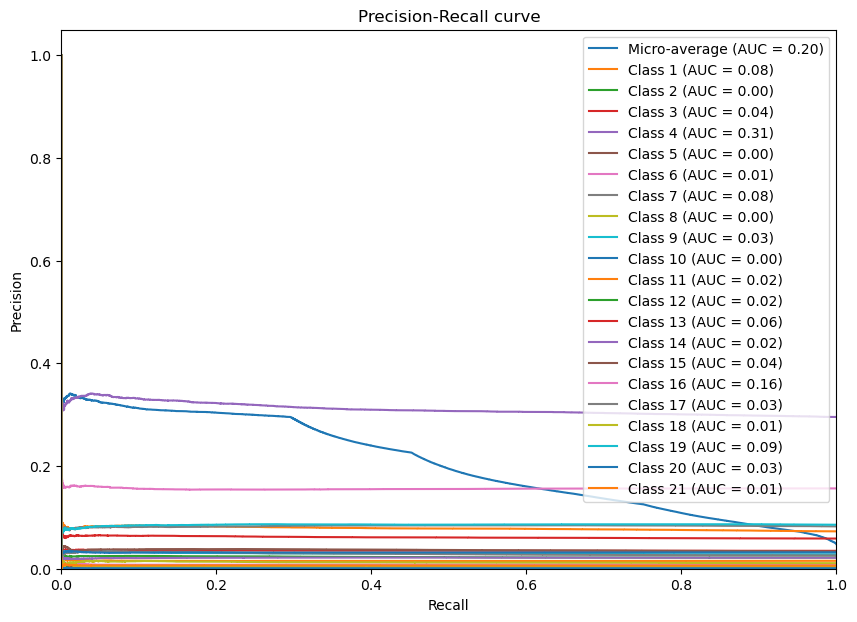

In [23]:

plt.figure(figsize=(10, 7))
plt.step(recall["micro"], precision["micro"], where='post', label='Micro-average (AUC = {0:0.2f})'.format(average_precision["micro"]))
for i in range(len(department_labels)):
    plt.step(recall[i], precision[i], where='post', label='Class {0} (AUC = {1:0.2f})'.format(department_labels[i], average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.show()


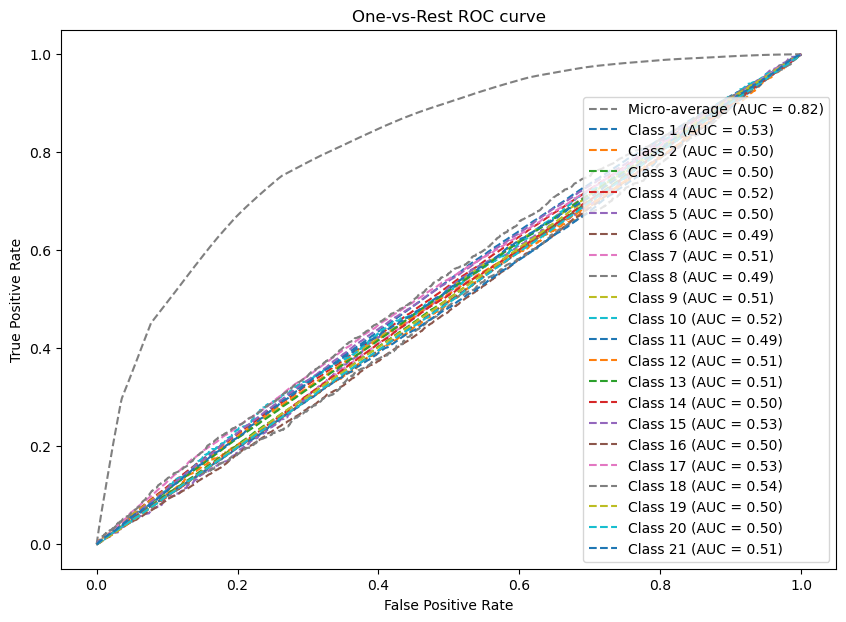

In [24]:

plt.figure(figsize=(10, 7))
plt.plot(fpr["micro"], tpr["micro"], linestyle='--', color='grey', label='Micro-average (AUC = {0:0.2f})'.format(roc_auc["micro"]))
for i in range(len(department_labels)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {0} (AUC = {1:0.2f})'.format(department_labels[i], roc_auc[i]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC curve')
plt.legend(loc='best')
plt.show()